### Problem Statement

The data clearly demonstrates the importance of credit history in loan approval decisions. Applicants with a good credit history are far more likely to have their loans approved, while those with poor credit history face significant challenges in securing approval. This analysis seeks to explore the relationship between credit history and loan approval status, highlighting the impact of creditworthiness on the likelihood of obtaining a loan. The goal is to provide insights that can help financial institutions improve their loan approval processes and assist applicants in understanding the importance of maintaining a good credit record.

In [460]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [461]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [462]:
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [463]:
df.tail()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [464]:
df.shape

(613, 13)

**This dataset contains both numerical and categorical values, with 613 rows and 13 columns. Among these, 12 columns are independent variables and 1 column is the target variable. As the target variable is categorical, this is a classification problem.**  

### Data Explotory Analysis(EDA)

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LP001002    613 non-null    object 
 1   Male        600 non-null    object 
 2   No          610 non-null    object 
 3   0           598 non-null    object 
 4   Graduate    613 non-null    object 
 5   No.1        581 non-null    object 
 6   5849        613 non-null    int64  
 7   0.1         613 non-null    float64
 8   Unnamed: 8  592 non-null    float64
 9   360         599 non-null    float64
 10  1           563 non-null    float64
 11  Urban       613 non-null    object 
 12  Y           613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


- The dataset contains Three types of datatype 'int','Float' and 'Object'
- There is null value is present in dataset

#### Checking duplicate values 

In [466]:
#showing Duplicated values sum
df.duplicated().sum()

0

#### Checking null,Nan and other

In [467]:
#showing null values 
df.isnull().sum()

LP001002       0
Male          13
No             3
0             15
Graduate       0
No.1          32
5849           0
0.1            0
Unnamed: 8    21
360           14
1             50
Urban          0
Y              0
dtype: int64

From above we can observed that columns 'LP001002','Male','No','0','No.1','Unnamed: 8','360' and '1' have null values

In [468]:
for unique in df.columns:
    print(unique,'=>',df[unique].unique(),'\n')

LP001002 => ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027' 'LP001028'
 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036' 'LP001038'
 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050' 'LP001052'
 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087' 'LP001091'
 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106' 'LP001109'
 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120' 'LP001123'
 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225' 'LP001228'
 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248'
 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259' 'LP001263'
 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273' 'LP001275'
 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP00

From above we can observed that
- Columns name not proper we will change the columns name as below
1. Loan_ID
2. Gender
3. Married
4. Dependents
5. Education
6. Self_Employed
7. Applicant_Income
8. Coapplicant_Income
9. Loan_Amount
10. Loan_Amount_Term
11. Credit_History
12. Property_Area
13. Loan_Status

In [469]:
df.columns

Index(['LP001002', 'Male', 'No', '0', 'Graduate', 'No.1', '5849', '0.1',
       'Unnamed: 8', '360', '1', 'Urban', 'Y'],
      dtype='object')

In [470]:
df.rename(columns={'LP001002':'Loan_ID','Male':'Gender', 'No':'Married', '0':'Dependents', 'Graduate':'Education', 'No.1':'Self_Employed', '5849':'Applicant_Income', '0.1':'Coapplicant_Income',
       'Unnamed: 8':'Loan_Amount', '360':'Loan_Amount_Term', '1':'Credit_History', 'Urban':'Property_Area', 'Y':'Loan_Status'},inplace=True)

In [471]:
for unique in df.columns:
    print(unique,'=>',df[unique].unique(),'\n')

Loan_ID => ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027' 'LP001028'
 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036' 'LP001038'
 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050' 'LP001052'
 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087' 'LP001091'
 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106' 'LP001109'
 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120' 'LP001123'
 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225' 'LP001228'
 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248'
 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259' 'LP001263'
 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273' 'LP001275'
 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

The details of attributes
1. **Loan_ID**: This refers to the unique identifier of the applicant's affirmed purchases.
2. **Gender**: This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions.
3. **Married**: This refers to the applicant being in a state of matrimony.
4. **Dependents**: This refers to persons who depend on the applicant for survival.
5. **Education**: This refers to the number of years in which the applicant received systematic instruction, especially at a school or university.
6. **Self_Employed**: This refers to the applicant working for oneself as a freelancer or the owner of a business rather than for an employer.
7. **Applicant_Income**: This refers to the disposable income available for the applicant's use under state law.
8. **Coapplicant_Income**: This refers to the disposable income available for the people who participate in the loan application process alongside the main applicant, under state law.
9. **Loan_Amount**: This refers to the amount of money an applicant owes at any given time.
10. **Loan_Amount_Term**: This refers to the duration for which the loan is availed to the applicant.
11. **Credit_History**: This refers to a record of the applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. **Property_Area**: This refers to the total area within the boundaries of the property as set out in the schedule.
13. **Loan_Status**: This refers to whether the applicant is eligible to be availed the loan requested.

In [472]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [473]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           21
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [474]:
categorical_columns=df.loc[:,df.dtypes=='object']
numerical_columns=df.loc[:,df.dtypes=="float64"]
# Display the columns
print("Categorical Columns:")
print(categorical_columns.columns)

print("\nNumerical Columns:")
print(numerical_columns.columns)

Categorical Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Numerical Columns:
Index(['Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')


#### Filling Nan value 

In [475]:
for columns in categorical_columns.columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [476]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [477]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [478]:
df['Coapplicant_Income']=df['Coapplicant_Income'].fillna(df['Coapplicant_Income'].mean())

In [479]:
df['Loan_Amount']=df['Loan_Amount'].fillna(df['Loan_Amount'].mean())

- We have filled NaN values in the dataset by using the mean for numerical columns and the mode for categorical columns.

In [480]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [481]:
df.drop('Loan_ID',axis=1,inplace=True)

The Loan_ID have unique values so we will drop this column

### Data Visulazation

#### 1.Univarite Analysis

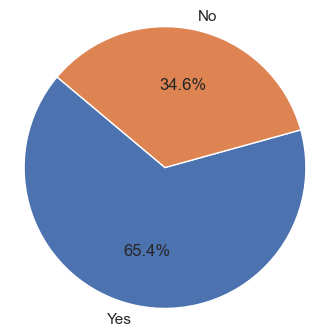

In [482]:
marital_counts = df['Married'].value_counts()
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

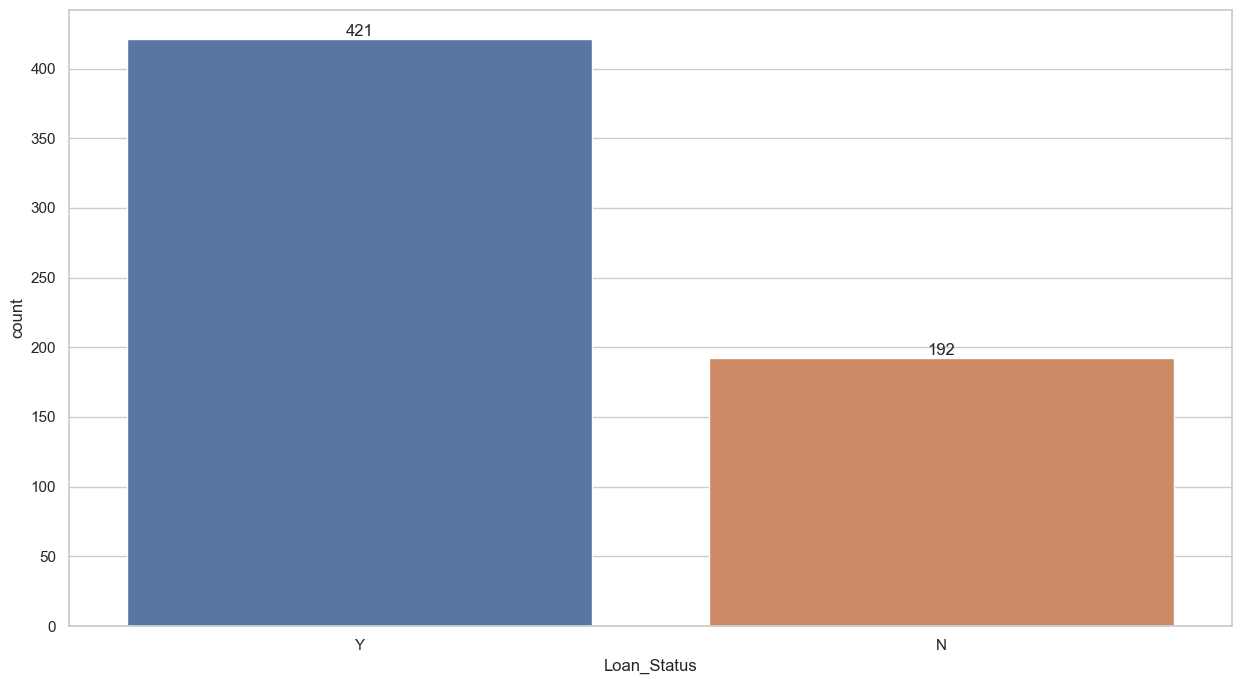

In [483]:
# Count the occurrences of each category in 'Loan Status'
loan_counts = df['Loan_Status'].value_counts().sort_values(ascending=False)

# Reorder the categories in 'Loan Status' based on the sorted counts
sorted_order = loan_counts.index

# Setting the figure size
plt.figure(figsize=(15, 8))

# Creating the count plot with sorted order
ax = sns.countplot(data=df, x='Loan_Status', order=sorted_order)

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Rotating the x-axis labels
plt.xticks()

# Display the plot
plt.show()

#### From above graph we can observed that
- The number of loan status 'YES' is more as compare to the loan status 'NO' 
- Class Imbalance: The dataset shows a clear class imbalance in the Loan_Status column.

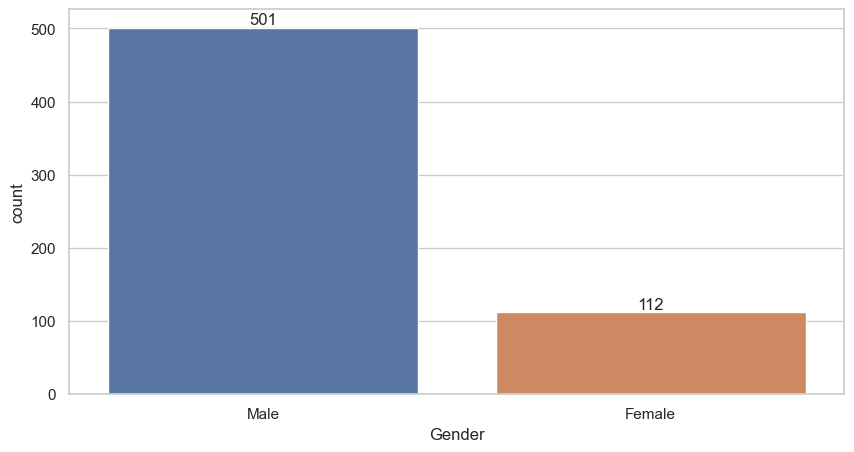

In [484]:
ax=sns.countplot(data=df,x='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

**The number of male applicants is higher compared to female applicants in the loan application status. This indicates that males apply for loans more frequently than femal.**.

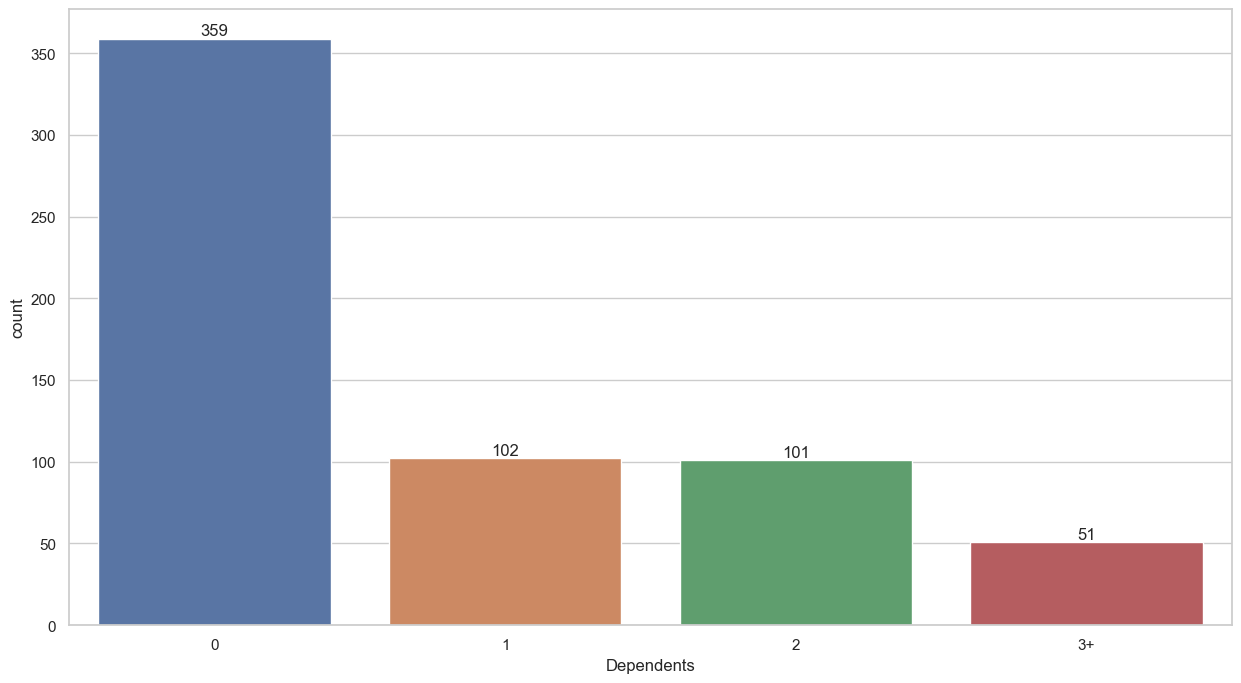

In [485]:
# Count the occurrences of each category in 'Dependents'
dependents_counts = df['Dependents'].value_counts().sort_values(ascending=False)

# Reorder the categories in 'Dependents' based on the sorted counts
sorted_order = dependents_counts.index

# Setting the figure size
plt.figure(figsize=(15, 8))

# Creating the count plot with sorted order
ax = sns.countplot(data=df, x='Dependents', order=sorted_order)

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Rotating the x-axis labels
plt.xticks()

# Display the plot
plt.show()

**The observation that the number of applicants with no dependents is higher compared to those with dependents in the loan application status suggests that individuals without dependents are more likely to apply for loans. This trend could be influenced by various factors including financial stability, perceived risk by lenders, and demographic characteristics of the applicants.**

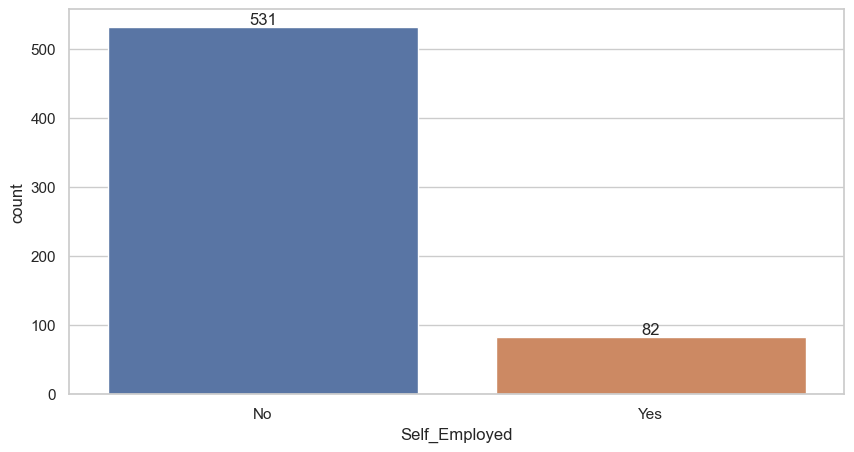

In [486]:
ax=sns.countplot(data=df,x='Self_Employed')
for bar in ax.containers:
    ax.bar_label(bar)

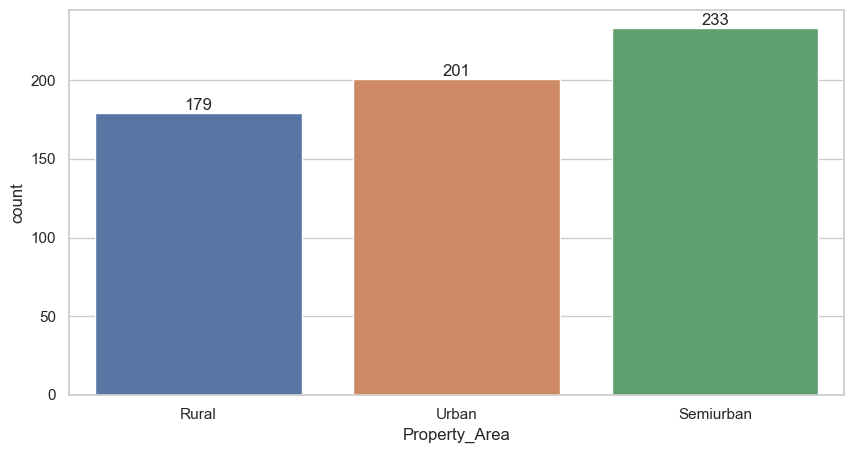

In [487]:
ax=sns.countplot(data=df,x='Property_Area')
for bar in ax.containers:
    ax.bar_label(bar)

The observation that the number of applicants from semiurban property areas is higher compared to those from rural and urban areas in the loan application status suggests that semiurban areas are becoming significant hubs for loan applications. This trend could be influenced by various factors including population growth, economic opportunities, accessibility of financial services, and ongoing development projects.

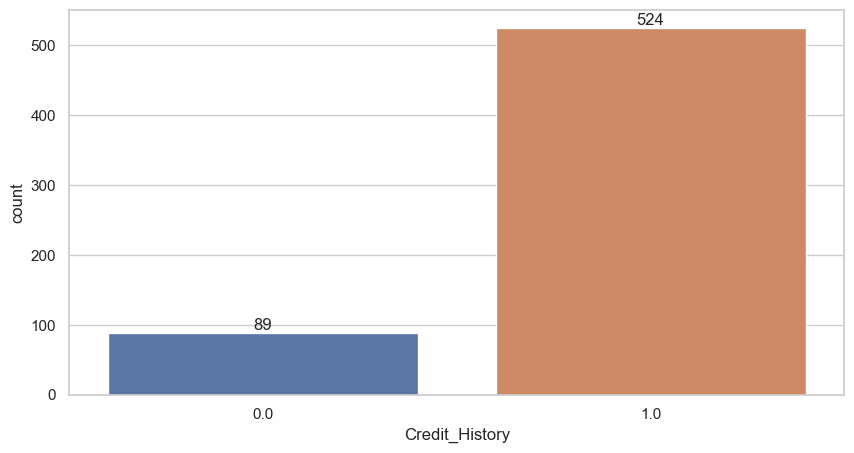

In [488]:
ax=sns.countplot(data=df,x='Credit_History')
for bar in ax.containers:
    ax.bar_label(bar)

- The observation that the number of applicants with a '1'(Yes) credit history is higher compared to those with a '0'(No) in the loan application status indicates that a significant proportion of applicants are considered creditworthy by lenders. This trend highlights the importance of maintaining a good credit history for individuals seeking loans, as it increases their chances of loan approval. It also suggests that lenders are likely to favor applicants with proven records of debt repayment and financial responsibility.

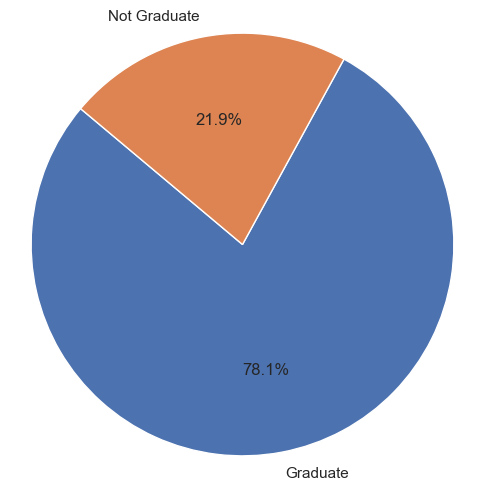

In [489]:
education_counts = df['Education'].value_counts()
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### 2. Bivariate Analysis

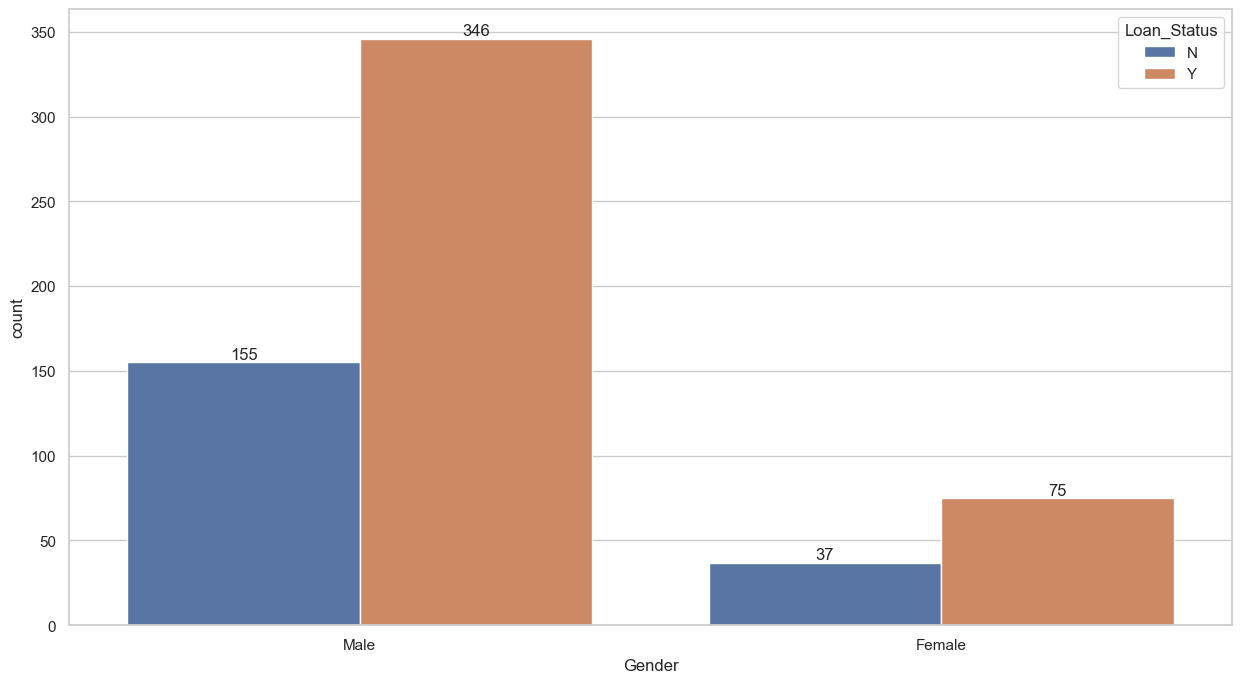

In [490]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=df,x='Gender',hue='Loan_Status')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks()    
plt.show()  

The observation that the number of male applicants with loan status 'YES' is higher compared to female applicants with loan status 'YES' suggests that males are either applying for loans more frequently or are more likely to meet the approval criteria set by lenders. This trend could be influenced by various factors including application volume, approval rates, socioeconomic factors, and creditworthiness. Understanding these dynamics can help lenders address potential gender disparities in loan applications and approvals

Text(0.5, 1.0, 'Loan_Status Analysis:Married')

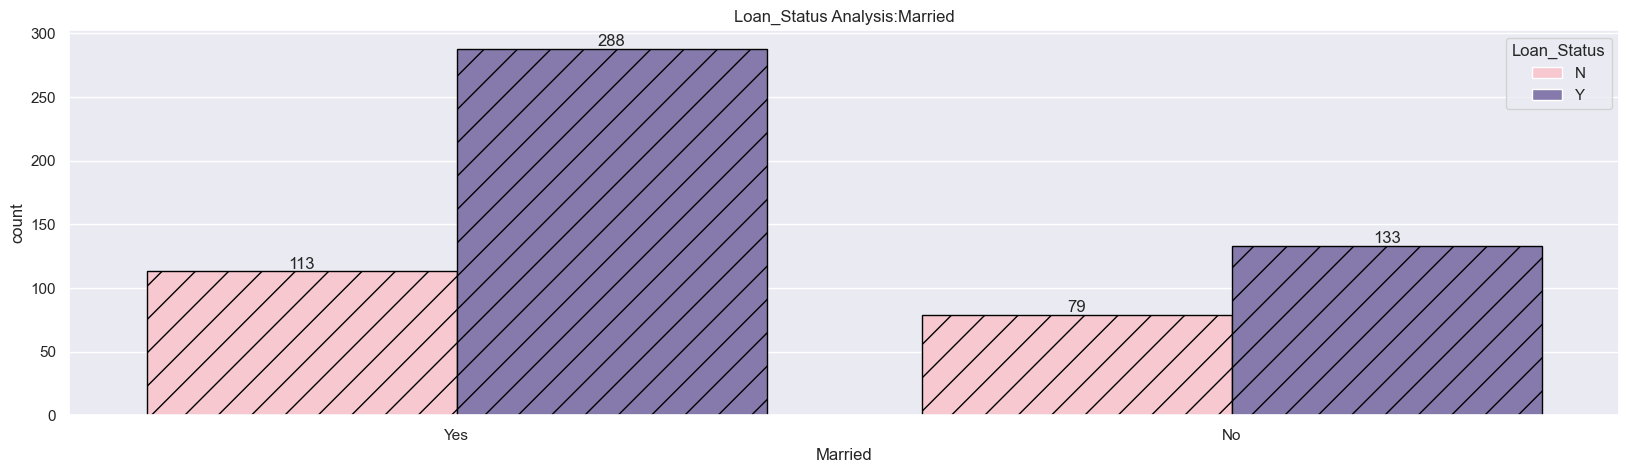

In [491]:
# Define custom color palette
custom_palette = ['pink','m']  
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Married',data=df,hue='Loan_Status',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Loan_Status Analysis:Married')

The observation that the number of married applicants with loan status 'YES' is higher compared to unmarried applicants with loan status 'YES' suggests that married individuals are either applying for loans more frequently or are more likely to meet the approval criteria set by lenders. This trend could be influenced by factors such as perceived stability, combined household income, loan amount and purpose, and creditworthiness

Text(0.5, 1.0, 'Loan Status Analysis: Credit_History')

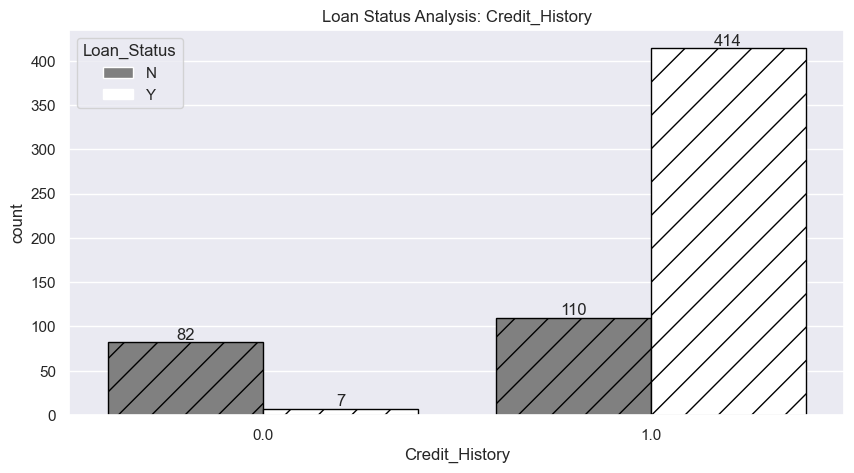

In [492]:
# Define custom color palette
custom_palette = ['grey','white']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Credit_History',data=df,hue='Loan_Status',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Loan Status Analysis: Credit_History')

The data clearly demonstrates the importance of credit history in loan approval decisions. Applicants with a good credit history are far more likely to have their loans approved, while those with poor credit history face significant challenges in securing approval

Text(0.5, 1.0, 'Loan_Status Analysis:Loan_Amount_Term')

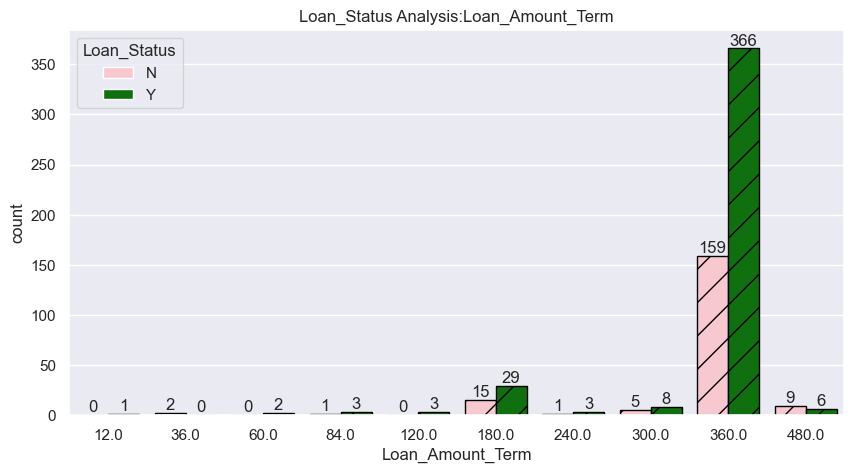

In [494]:
# Define custom color palette
custom_palette = ['pink','green','m']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Loan_Amount_Term',data=df,hue='Loan_Status',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Loan_Status Analysis:Loan_Amount_Term')  

The graph indicates a strong preference for longer loan terms among applicants, particularly for the 360-month term. This term also has a higher approval rate, suggesting it might be more aligned with both lender and borrower preferences. Shorter loan terms are much less common and have a more varied approval status

Text(0.5, 1.0, 'Loan_Status Analysis:Education')

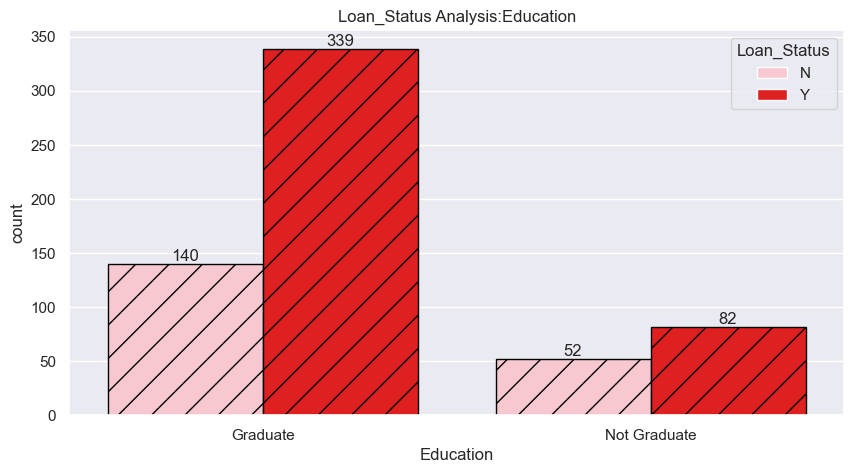

In [495]:
# Define custom color palette
custom_palette = ['pink','red']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Education',data=df,hue='Loan_Status',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Loan_Status Analysis:Education')  

The data suggests that educational attainment, specifically being a graduate, is associated with a higher likelihood of loan approval. This could be due to several factors:
- Perceived Financial Stability: Graduates may be perceived as having better job prospects and financial stability.
- Income Levels: Graduates might have higher income levels, making them more eligible for loans.
- Risk Assessment: Lenders might consider graduates as lower-risk borrowers compared to non-graduates.

Text(0.5, 1.0, 'Loan_Status Analysis:Property_Area')

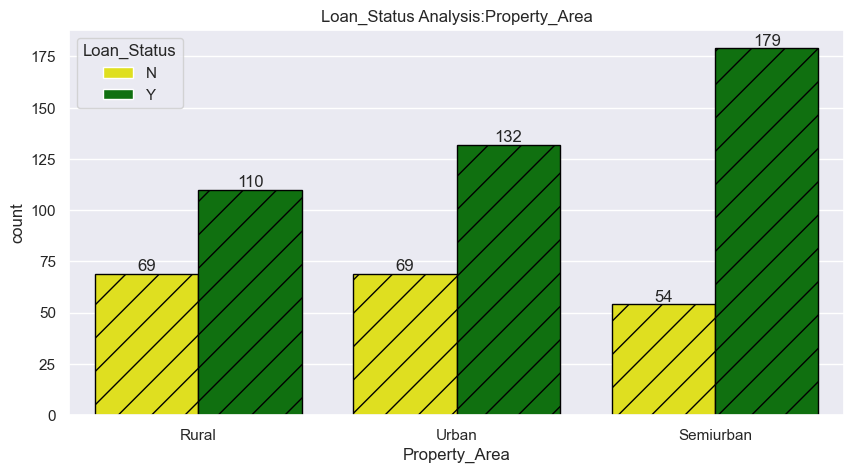

In [496]:
# Define custom color palette
custom_palette = ['yellow','green']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Property_Area',data=df,hue='Loan_Status',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Loan_Status Analysis:Property_Area')  

The bar chart depicts the loan approval status (Y/N) based on different property areas (Rural, Urban, and Semiurban). It shows that loan approvals (Y) are higher across all property areas, with the highest approval rate in the Semiurban area (179) compared to Rural (110) and Urban (132). Conversely, loan rejections (N) are relatively consistent across all areas, with the Semiurban area having the lowest rejections (54).

#### 3.Multivariate Analysis

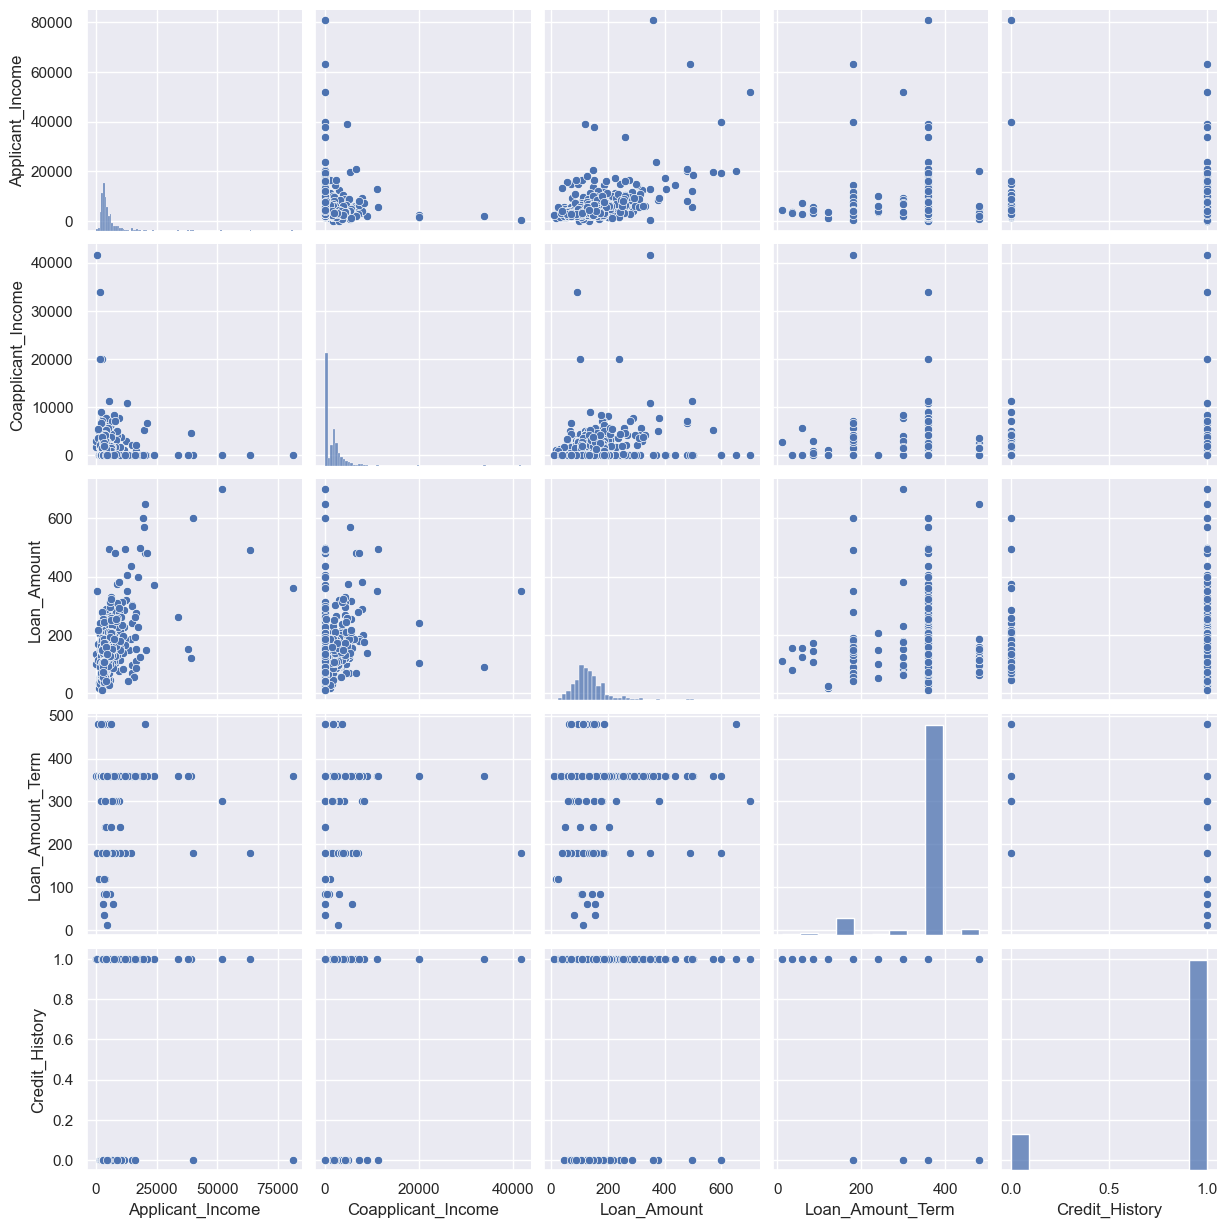

In [497]:
sns.pairplot(data=df)

In [498]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


#### Checking Statistical Summary

In [499]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,342.381729,0.854812
std,6114.004114,2927.903583,84.106098,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Based on the above statistical summary:
- The mean is greater than the median (50th percentile) for the columns 'Coapplicant_Income' and 'Loan_Amount', indicating that these distributions are right-skewed.
- There is a significant difference between the maximum value and the 75th percentile for these columns, suggesting the presence of outliers.

### Performing Encoding

In [500]:
#importing Encoder onehot Encoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
list=['Gender','Married','Education','Self_Employed','Loan_Status']
for column in list:
    df[column]=onehotencoder.fit_transform(df[[column]]).toarray()

We used a one-hot encoder here because the above columns contain categorical values with only two unique types.

In [501]:
#importing Encoder label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list=['Dependents','Property_Area']
for column in list:
    df[column]=labelencoder.fit_transform(df[column])

We used a Label encoder here because the above columns contain categorical values with more than two unique types.

In [502]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,1.0,1.0,4583,1508.0,128.0,360.0,1.0,0,1.0
1,0.0,0.0,0,1.0,0.0,3000,0.0,66.0,360.0,1.0,2,0.0
2,0.0,0.0,0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,2,0.0
3,0.0,1.0,0,1.0,1.0,6000,0.0,141.0,360.0,1.0,2,0.0
4,0.0,0.0,2,1.0,0.0,5417,4196.0,267.0,360.0,1.0,2,0.0


- We performing encoder for transforming string values into integer

### Checking Outliers

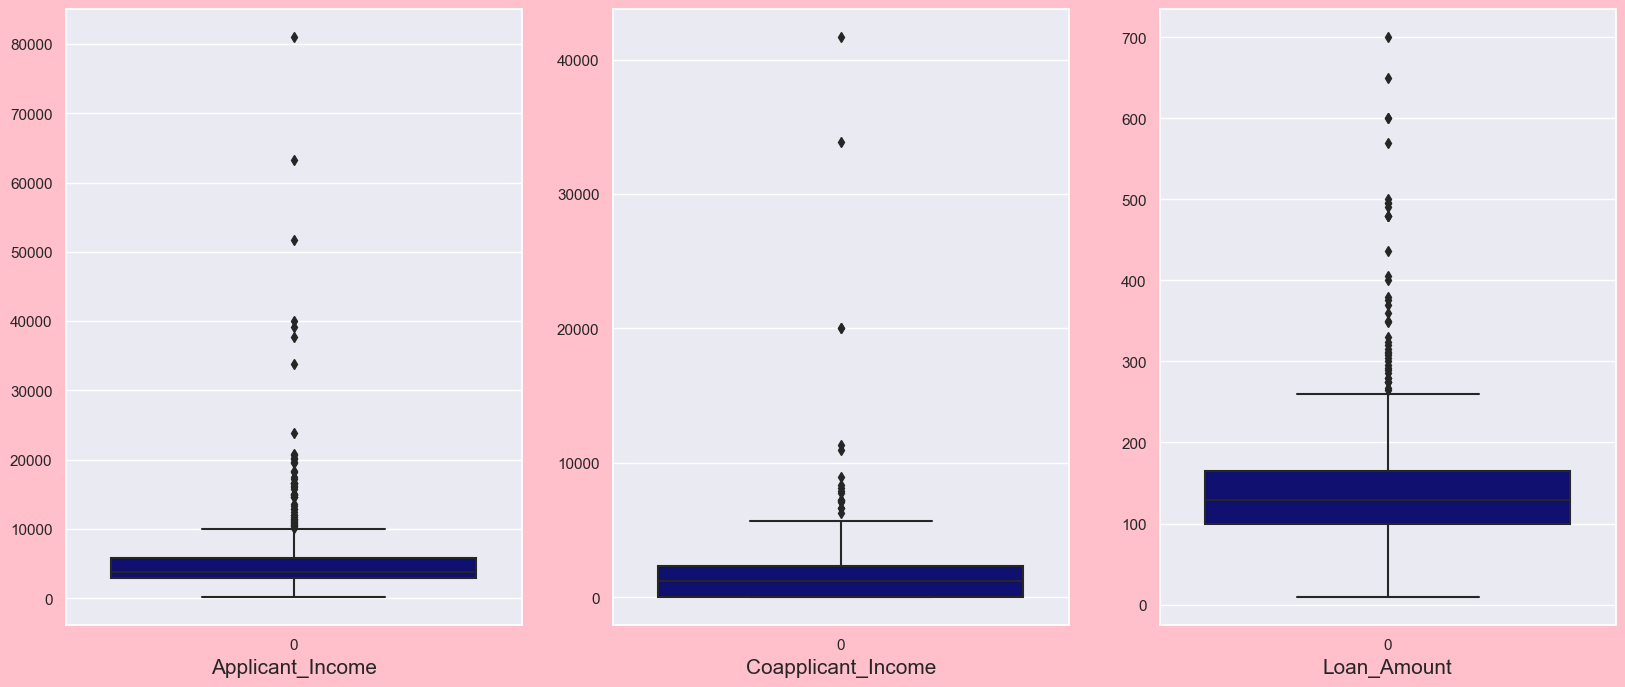

In [503]:
plt.figure(figsize=(20,8),facecolor='pink')
count=1
list=['Applicant_Income','Coapplicant_Income','Loan_Amount']
for i in list:
    if count<=4:
        ax=plt.subplot(1,3,count)
        sns.boxplot(df[i],color='navy')
        plt.xlabel(i,fontsize=15)
    count+=1
plt.show()

In [504]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to clean
columns_to_clean = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']

# Remove outliers from each column
for column in columns_to_clean:
    df = remove_outliers(df, column)
df.reset_index(drop=True, inplace=True)    

We removed outliers from above columns by usning IQR methods

#### Checking Skewness

In [505]:
df.skew()

Gender                1.594801
Married               0.618806
Dependents            1.069047
Education            -1.143246
Self_Employed        -2.441167
Applicant_Income      1.176201
Coapplicant_Income    0.811373
Loan_Amount           0.095620
Loan_Amount_Term     -2.400878
Credit_History       -1.984241
Property_Area        -0.013566
Loan_Status           0.852456
dtype: float64

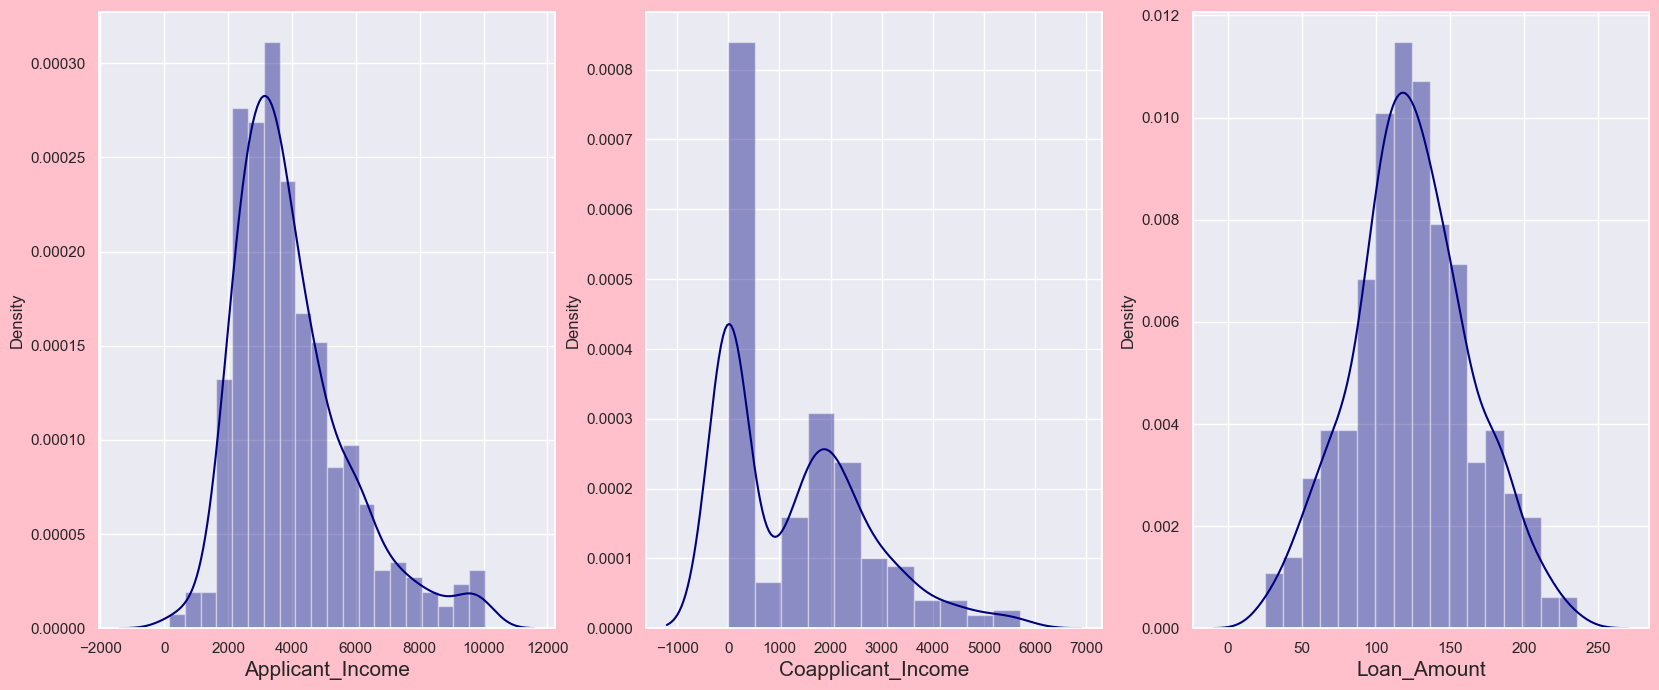

In [506]:
plt.figure(figsize=(20,8),facecolor='pink')
count=1
list=['Applicant_Income','Coapplicant_Income','Loan_Amount']
for i in list:
    if count<=4:
        ax=plt.subplot(1,3,count)
        sns.distplot(df[i],color='navy')
        plt.xlabel(i,fontsize=15)
    count+=1
plt.show()

From the observations above, we notice skewness in the dataset. But we only focusing numerical columns of'Applicant_Income', and 'Coapplicant_Income' columns not categorical.

In [507]:
#removing skewness by using cuberoot method
df['Applicant_Income']=np.cbrt(df['Applicant_Income'])

In [508]:
#removing skewness by using cuberoot method
df['Coapplicant_Income']=np.cbrt(df['Coapplicant_Income'])

We removing skewness of above columns by using square root methods

In [509]:
df.skew()

Gender                1.594801
Married               0.618806
Dependents            1.069047
Education            -1.143246
Self_Employed        -2.441167
Applicant_Income      0.112179
Coapplicant_Income   -0.137983
Loan_Amount           0.095620
Loan_Amount_Term     -2.400878
Credit_History       -1.984241
Property_Area        -0.013566
Loan_Status           0.852456
dtype: float64

### Splitting the data into training and test

In [510]:
#seperating independent variable and target into x and y
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (519, 11)
Dimension of Target (519,)


### Feature scaling using StandardScaler

In [511]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.482472,-0.737999,0.296175,0.581058,0.358135,0.470242,0.620426,0.092122,0.266050,0.417382,-1.283406
1,-0.482472,-0.737999,-0.715108,0.581058,-2.792241,-0.479663,-1.130198,-1.458922,0.266050,0.417382,1.263774
2,-0.482472,-0.737999,-0.715108,-1.720997,0.358135,-0.784360,0.901724,-0.108013,0.266050,0.417382,1.263774
3,-0.482472,1.355015,-0.715108,0.581058,0.358135,1.147793,-1.130198,0.417341,0.266050,0.417382,1.263774
4,-0.482472,-0.737999,-0.715108,-1.720997,0.358135,-0.983091,0.623516,-0.733434,0.266050,0.417382,1.263774
...,...,...,...,...,...,...,...,...,...,...,...
514,-0.482472,-0.737999,-0.715108,0.581058,0.358135,-0.322250,0.777036,-0.408215,0.266050,0.417382,-1.283406
515,2.072660,1.355015,-0.715108,0.581058,0.358135,-0.550022,-1.130198,-1.333838,0.266050,0.417382,-1.283406
516,-0.482472,-0.737999,2.318741,0.581058,0.358135,0.210839,-1.130198,-2.109360,-2.477263,0.417382,-1.283406
517,-0.482472,-0.737999,1.307458,0.581058,0.358135,1.788179,-1.130198,1.568116,0.266050,0.417382,1.263774


We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.

#### Checking Variance Inflation Factor(VIF)

In [512]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.208007,Gender
1,1.417483,Married
2,1.194916,Dependents
3,1.058282,Education
4,1.036705,Self_Employed
5,1.761207,Applicant_Income
6,1.679513,Coapplicant_Income
7,1.606244,Loan_Amount
8,1.058210,Loan_Amount_Term
9,1.011904,Credit_History


### Oversampling

In [513]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

We used an oversampling method to address the class imbalance problem.

#### Model Selection

In [514]:
from sklearn.model_selection import train_test_split

In [515]:
#Importing mode
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier #Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier #Gradient Boosting Classifier ,AdaBoost Classifier 
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Classifier

In [516]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum accuracy_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum accuracy_Score is=> 0.783410138248848 On Random State=> 28


In [517]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_state)

#### LogisticRegression

In [518]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.8461538461538461
Confusion Matrix:- [[107   0]
 [ 24  25]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       107
         1.0       1.00      0.51      0.68        49

    accuracy                           0.85       156
   macro avg       0.91      0.76      0.79       156
weighted avg       0.87      0.85      0.83       156

------------------------------------------------------------


#### ExtraTreesClassifier

In [519]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

ExtraTreesClassifier()
Accuracy Score:- 0.8461538461538461
Confusion Matrix:- [[102   5]
 [ 19  30]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       107
         1.0       0.86      0.61      0.71        49

    accuracy                           0.85       156
   macro avg       0.85      0.78      0.80       156
weighted avg       0.85      0.85      0.84       156

------------------------------------------------------------


##### DecisionTreeClassifier

In [520]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

DecisionTreeClassifier()
Accuracy Score:- 0.717948717948718
Confusion Matrix:- [[83 24]
 [20 29]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       107
         1.0       0.55      0.59      0.57        49

    accuracy                           0.72       156
   macro avg       0.68      0.68      0.68       156
weighted avg       0.72      0.72      0.72       156

------------------------------------------------------------


#### GradientBoostingClassifier

In [521]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.8205128205128205
Confusion Matrix:- [[100   7]
 [ 21  28]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.80      0.57      0.67        49

    accuracy                           0.82       156
   macro avg       0.81      0.75      0.77       156
weighted avg       0.82      0.82      0.81       156

------------------------------------------------------------


#### AdaBoostClassifier

In [522]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(abc)
print('Accuracy Score:-',accuracy_score(y_test,pred_abc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_abc))
print('Classification Report:-',classification_report(y_test,pred_abc))
print('---'*20)

AdaBoostClassifier()
Accuracy Score:- 0.8141025641025641
Confusion Matrix:- [[100   7]
 [ 22  27]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       107
         1.0       0.79      0.55      0.65        49

    accuracy                           0.81       156
   macro avg       0.81      0.74      0.76       156
weighted avg       0.81      0.81      0.80       156

------------------------------------------------------------


#### RandomForestClassifier

In [523]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.8333333333333334
Confusion Matrix:- [[105   2]
 [ 24  25]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       107
         1.0       0.93      0.51      0.66        49

    accuracy                           0.83       156
   macro avg       0.87      0.75      0.77       156
weighted avg       0.85      0.83      0.82       156

------------------------------------------------------------


#### KNeighborsClassifier

In [524]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8333333333333334
Confusion Matrix:- [[105   2]
 [ 24  25]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       107
         1.0       0.93      0.51      0.66        49

    accuracy                           0.83       156
   macro avg       0.87      0.75      0.77       156
weighted avg       0.85      0.83      0.82       156

------------------------------------------------------------


#### SVC

In [525]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(svc)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

SVC()
Accuracy Score:- 0.8461538461538461
Confusion Matrix:- [[107   0]
 [ 24  25]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       107
         1.0       1.00      0.51      0.68        49

    accuracy                           0.85       156
   macro avg       0.91      0.76      0.79       156
weighted avg       0.87      0.85      0.83       156

------------------------------------------------------------


### Cross Validation Score

In [526]:
from sklearn.model_selection import cross_val_score

#### LogisticRegression

In [527]:
score=cross_val_score(LG,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[0.82692308 0.78846154 0.78846154 0.86538462 0.84466019]
0.8227781926811053
Difference between accuracy score and cross validation score is: 2.3375653472740843


#### ExtraTreesClassifier

In [528]:
score1=cross_val_score(etc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score1.mean())*100)

[0.79807692 0.76923077 0.76923077 0.80769231 0.78640777]
0.7861277072442121
Difference between accuracy score and cross validation score is: 6.002613890963405


##### DecisionTreeClassifier

In [529]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.78846154 0.69230769 0.72115385 0.74038462 0.75728155]
0.7399178491411502
Difference between accuracy score and cross validation score is: -2.1969131192432267


#### GradientBoostingClassifier

In [530]:
score3=cross_val_score(gbc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score3.mean())*100)

[0.80769231 0.74038462 0.78846154 0.79807692 0.80582524]
0.7880881254667663
Difference between accuracy score and cross validation score is: 3.2424695046054164


#### AdaBoostClassifier

In [531]:
score4=cross_val_score(abc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_abc)-score4.mean())*100)

[0.80769231 0.75961538 0.78846154 0.82692308 0.84466019]
0.805470500373413
Difference between accuracy score and cross validation score is: 0.8632063729151151


#### RandomForestClassifier

In [532]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.83653846 0.76923077 0.79807692 0.85576923 0.82524272]
0.8169716206123974
Difference between accuracy score and cross validation score is: 1.6361712720936006


#### KNeighborsClassifier

In [533]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score6.mean())*100)

[0.82692308 0.75961538 0.77884615 0.81730769 0.78640777]
0.7938200149365198
Difference between accuracy score and cross validation score is: 3.95133183968136


#### SVC

In [534]:
score7=cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.82692308 0.78846154 0.78846154 0.875      0.84466019]
0.8247012696041821
Difference between accuracy score and cross validation score is: 2.1452576549664037


##### Based on these observations
- The RandomForestClassifier seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- RandomForestClassifier is our best  fitting and best performing model

In [535]:
from sklearn.model_selection import GridSearchCV

In [536]:
param_grid={'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]}

In [537]:
GCV=GridSearchCV(rfc,param_grid,cv=5)

In [539]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]})

In [540]:
GCV.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [564]:
best_model=RandomForestClassifier(n_estimators=200,max_depth=10,max_features='log2',min_samples_leaf=2)
best_model.fit(x_train,y_train)
pred_RFC=best_model.predict(x_test)
print('Accuracy Score:-',accuracy_score(y_test,pred_RFC)*100)
print('Confusion Matrix:-',confusion_matrix(y_test,pred_RFC))
print('Classification Report:-',classification_report(y_test,pred_RFC))

Accuracy Score:- 84.61538461538461
Confusion Matrix:- [[107   0]
 [ 24  25]]
Classification Report:-               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       107
         1.0       1.00      0.51      0.68        49

    accuracy                           0.85       156
   macro avg       0.91      0.76      0.79       156
weighted avg       0.87      0.85      0.83       156



##### By adding parameter my model give 84.61% accuracy

In [566]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

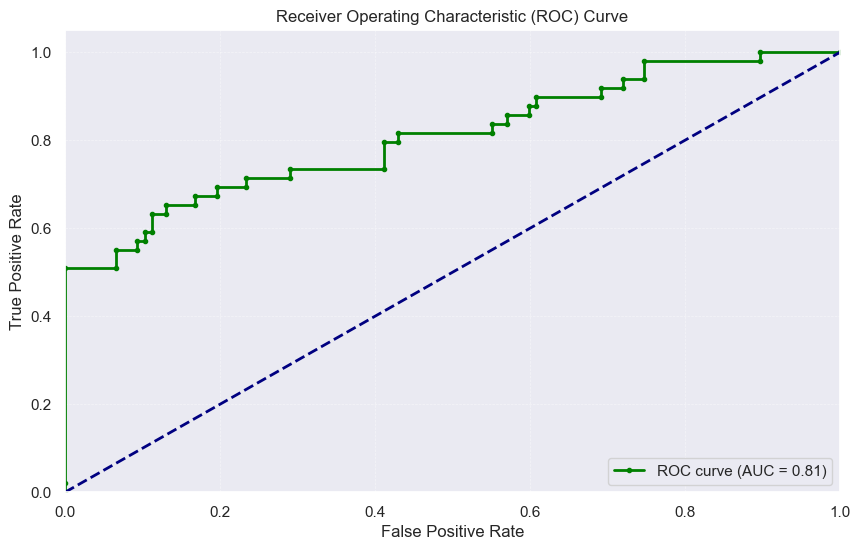

In [567]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

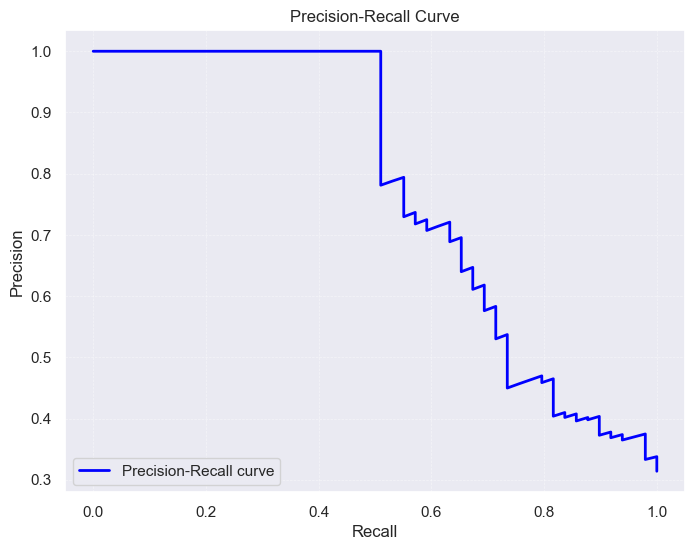

In [568]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

### Saving the Model

In [569]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Loan Application Status.pkl")

['Loan Application Status.pkl']

In [570]:
#Now loading file and checcking prediction 
model=joblib.load("Loan Application Status.pkl")

In [571]:
prediction=model.predict(x_test)
prediction

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

In [572]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0


#####  In analyzing the Loan Application Status Predication dataset, I employed classification techniques within supervised learning, following the exploratory data analysis (EDA) process diligently. This involved initial steps such as removing duplicate records, exploring the relationship between the target variable and independent variables, and visualizing data through various graphs to discern underlying patterns. Additionally, I transformed categorical data into numerical format using encoding methods. Furthermore, I enhanced model performance through hyperparameter tuning and evaluated the models using AUC ROC curve and precision curve. Ultimately, after splitting the data and assessing multiple models, Random Forest Classifier emerged as the top-performing model with an accuracy of 84.61%. 